In [1]:
import pandas as pd
import requests
import json
import time
# import numpy as np
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# from sklearn.metrics import roc_auc_score, roc_curve #Revérifier si tous les import de cette ligne sont utilisés
# from sklearn.model_selection import train_test_split

# from sklearn.linear_model import LogisticRegression
# from sklearn import svm
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("data/aaaa.csv", delimiter = ';')

In [3]:
df['URL_query'] = '' #Create column of URLs we can query with modules and APIs later
N = len(df)
for i in range(N):
    url = df.loc[i]['URLs']
    if 'https://' in url:
        df['URL_query'][i] = url
    else:
        new_url = "https://" + url
        df['URL_query'][i] = new_url

In [4]:
df["request"] = 0
for i in range(len(df["URL_query"])): #We check the accesses to each link and Fast check of URL access
    url = df["URL_query"][i]
    try:
        r = requests.get(url, auth=('user', 'pass'))
#         print(r.status_code)
        df["request"][i] = r.status_code
    except:
        df["request"][i] = "unreachable"
#         print("unreachable")

df.drop(df[df["request"] != 200].index, inplace = True)

df.reset_index(drop = True, inplace = True)

C:\Users\tahad\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\tahad\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\tahad\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### /!\ Caution: Runtime of the following block exceeds 15 minutes

In [10]:
l = []
key = "wuro4lfosm0mszlksu5523ij4ca5rqxhiz54uz0c9mgnyb2ldvvemm9jj4jsk6zg85oy8z"
for i in range(len(df)):
    url = "https://whatcms.org/API/Tech?key=" + key + "&url=" + df['URL_query'][i]
    
    payload={}
    headers = {}
    
    response = requests.request("GET", url, headers=headers, data=payload)
    output = json.loads(response.text)
    l.append(output)
    time.sleep(11)

# Data integration

In [24]:
whatcms_df = pd.DataFrame(l)

# with open("l_tech.json","r") as f:
#     whatcms_df = pd.DataFrame(json.load(f))


whatcms_df.pop('request')
whatcms_df.pop('request_web')
whatcms_df.pop('last_checked')
whatcms_df.pop('result')

whatcms_df['URL'] = df['URL_query']

In [25]:
temp_res = [] #Out of the whatcms output I only pick the names of the CMS/tech used
N = len(whatcms_df)
for i in range(N):
    row = whatcms_df.results[i]
    sub_l = []
    for j in range(len(row)):
        sub_l.append(row[j]['name'])
    temp_res.append(sub_l)

In [26]:
list_tags = [] #Exhaustive list of all the CMS/Tech used to build the columns of our dataframe
for _ in temp_res:
    for x in _:
        if x not in list_tags:
            list_tags.append(x)
n_tags = len(list_tags)

index_cms = [] #Same as temp_res, but with the indexes of a CMS instead of its name
for i in range(N):
    row = []
    row_cms = temp_res[i]
    for j in row_cms:
        row.append(list_tags.index(j))
    index_cms.append(row)

In [27]:
sparse_tags = [] #We generate a sparse Table for later model purpose
for i in range(N):
    row = index_cms[i]
    l_row = [0]*n_tags
    for x in row:
        l_row[x] = 1
    sparse_tags.append(l_row)
Tags_df = pd.DataFrame(sparse_tags, columns=list_tags)

In [38]:
full_df = pd.concat([df,Tags_df],axis = 1)
full_df.drop(['URLs','request'], inplace = True, axis = 1)

In [41]:
full_df.to_csv('data/whatcms_df.csv')

In [42]:
full_df

,dropshipping?,URL_query,Shopify,Cloudflare,cdnjs,jQuery CDN,Google Hosted Libraries,Unpkg,WordPress,WooCommerce,...,Ruby,Java,PageFly,Microsoft Ajax Content Delivery Network,Ubuntu,BigCommerce,Nginx,OpenResty,Next.js,Node.js
0,oui,https://touttrive.fr,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,oui,https://en.g-heat.com,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,oui,https://ecolessive.fr,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,oui,https://jolipuzzle.com,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,oui,https://dalinner.com,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Oui,https://www.clubfitwear.com/,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,Oui,https://notebooktherapy.com/,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
74,Oui,https://warmlydecor.com/,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
75,Oui,https://www.inspireuplift.com/,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [14]:
full_df.corr()

,Shopify,Cloudflare,cdnjs,jQuery CDN,Unpkg,WordPress,WooCommerce,PHP,MySQL,Apache,...,Akamai,Salesforce Commerce Cloud,Salesforce,PrestaShop,Magento,Debian,Microsoft ASP.NET,Ruby on Rails,Ruby,Java
Shopify,1.000000,0.577350,0.158114,0.158114,0.110432,-0.392232,-0.316228,-0.577350,-0.519875,-0.316228,...,-0.220863,-0.316228,-0.316228,-0.220863,-0.220863,-0.220863,-0.392232,-0.220863,-0.220863,-0.220863
Cloudflare,0.577350,1.000000,0.228218,0.091287,0.063758,-0.415168,-0.228218,-0.611111,-0.690345,-0.228218,...,-0.382546,0.091287,0.091287,-0.382546,-0.382546,-0.382546,0.113228,0.063758,0.063758,-0.382546
cdnjs,0.158114,0.228218,1.000000,0.400000,0.279372,0.062017,0.137500,-0.068465,-0.032880,0.137500,...,-0.087304,-0.125000,-0.125000,-0.087304,-0.087304,-0.087304,-0.155043,0.279372,0.279372,-0.087304
jQuery CDN,0.158114,0.091287,0.400000,1.000000,0.698430,-0.062017,-0.050000,-0.091287,-0.082199,-0.050000,...,-0.034922,-0.050000,-0.050000,-0.034922,-0.034922,-0.034922,-0.062017,-0.034922,-0.034922,-0.034922
Unpkg,0.110432,0.063758,0.279372,0.698430,1.000000,-0.043315,-0.034922,-0.063758,-0.057411,-0.034922,...,-0.024390,-0.034922,-0.034922,-0.024390,-0.024390,-0.024390,-0.043315,-0.024390,-0.024390,-0.024390
WordPress,-0.392232,-0.415168,0.062017,-0.062017,-0.043315,1.000000,0.806226,0.679366,0.754474,0.806226,...,-0.043315,-0.062017,-0.062017,-0.043315,-0.043315,0.563093,-0.076923,-0.043315,-0.043315,-0.043315
WooCommerce,-0.316228,-0.228218,0.137500,-0.050000,-0.034922,0.806226,1.000000,0.547723,0.608276,0.475000,...,-0.034922,-0.050000,-0.050000,-0.034922,-0.034922,-0.034922,-0.062017,-0.034922,-0.034922,-0.034922
PHP,-0.577350,-0.611111,-0.068465,-0.091287,-0.063758,0.679366,0.547723,1.000000,0.900450,0.547723,...,-0.063758,-0.091287,-0.091287,0.382546,0.382546,0.382546,-0.113228,-0.063758,-0.063758,-0.063758
MySQL,-0.519875,-0.690345,-0.032880,-0.082199,-0.057411,0.754474,0.608276,0.900450,1.000000,0.608276,...,-0.057411,-0.082199,-0.082199,0.424839,0.424839,0.424839,-0.101956,-0.057411,-0.057411,-0.057411
Apache,-0.316228,-0.228218,0.137500,-0.050000,-0.034922,0.806226,0.475000,0.547723,0.608276,1.000000,...,-0.034922,-0.050000,-0.050000,-0.034922,-0.034922,0.698430,-0.062017,-0.034922,-0.034922,-0.034922


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(25, 12))
sns.heatmap(full_df.corr())

In [16]:
full_df.drop(["Ruby on Rails","Salesforce Commerce Cloud"], axis = 1, inplace = True)

In [17]:
full_df.describe().iloc[1,:]

Shopify                    0.666667
Cloudflare                 0.857143
cdnjs                      0.238095
jQuery CDN                 0.047619
Unpkg                      0.023810
WordPress                  0.071429
WooCommerce                0.047619
PHP                        0.142857
MySQL                      0.119048
Apache                     0.047619
jsDelivr                   0.047619
Google Hosted Libraries    0.119048
Elementor                  0.023810
Akamai                     0.023810
Salesforce                 0.047619
PrestaShop                 0.023810
Magento                    0.023810
Debian                     0.023810
Microsoft ASP.NET          0.071429
Ruby                       0.023810
Java                       0.023810
Name: mean, dtype: float64

In [18]:
X = full_df.drop(["dropshipping?","URLs","URL_query"], axis = 1)
log_model = sm.OLS((full_df['dropshipping?'] == "oui")*1,X).fit()
print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:          dropshipping?   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     15.01
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           5.01e-09
Time:                        16:22:20   Log-Likelihood:                 27.410
No. Observations:                  42   AIC:                            -20.82
Df Residuals:                      25   BIC:                             8.720
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Shopify                   

In [19]:
X.drop(["cdnjs","jQuery CDN","Unpkg","jsDelivr","Google Hosted Libraries","Akamai","Java","Microsoft ASP.NET","Debian","WordPress","MySQL","Elementor"],axis = 1,inplace=True)
log_model = sm.OLS((full_df['dropshipping?'] == "oui")*1,X).fit()
print(log_model.summary())

                                 OLS Regression Results                                
Dep. Variable:          dropshipping?   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              172.3
Date:                Fri, 24 Jun 2022   Prob (F-statistic):                    4.14e-25
Time:                        16:22:20   Log-Likelihood:                          26.764
No. Observations:                  42   AIC:                                     -35.53
Df Residuals:                      33   BIC:                                     -19.89
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [20]:
X2 = sm.add_constant(np.array(full_df.drop(['URLs', 'dropshipping?', 'URL_query'],axis = 1)))
y2 = np.expand_dims(np.array((full_df['dropshipping?'] == "oui")*1),1)

X_train, X_test, y_train, y_test = train_test_split(X2,y2)

AUC the training set : 0.9500000000000001
AUC for the testing set : 0.9642857142857143


C:\Users\tahad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tahad\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\tahad\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alia

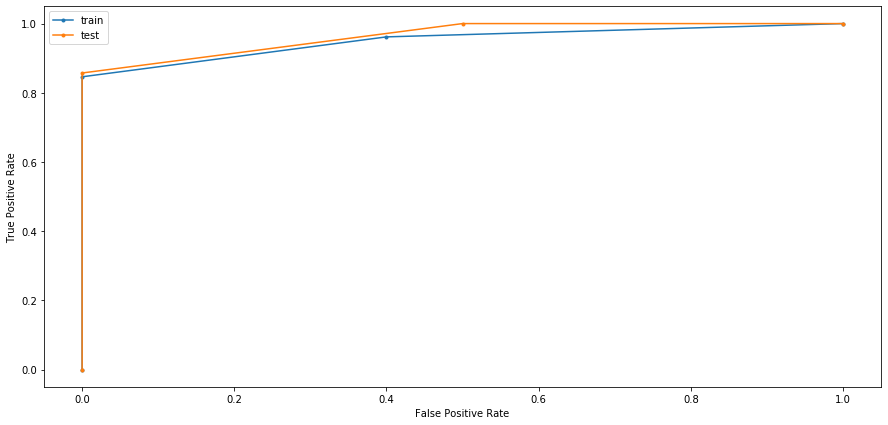

In [21]:
clf = LogisticRegression(penalty = "l1",solver = "liblinear").fit(X_train,y_train)

y_train_prediction = clf.predict(X_train)
y_test_prediction = clf.predict(X_test)

y_train_prediction_proba = clf.predict_proba(X_train)[:, 1]
y_test_prediction_proba = clf.predict_proba(X_test)[:, 1]

auc_train = roc_auc_score(y_train, y_train_prediction_proba)
auc_test = roc_auc_score(y_test, y_test_prediction_proba)

print('AUC the training set : '+str(auc_train))
print('AUC for the testing set : '+str(auc_test))

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prediction_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prediction_proba)

fig = plt.figure(figsize=(15,7))
ax = plt.plot(fpr_train, tpr_train, marker='.', label='train')
ax = plt.plot(fpr_test, tpr_test, marker='.', label='test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# show the plot
plt.show()

C:\Users\tahad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC the training set : 0.9846153846153847
AUC for the testing set : 1.0


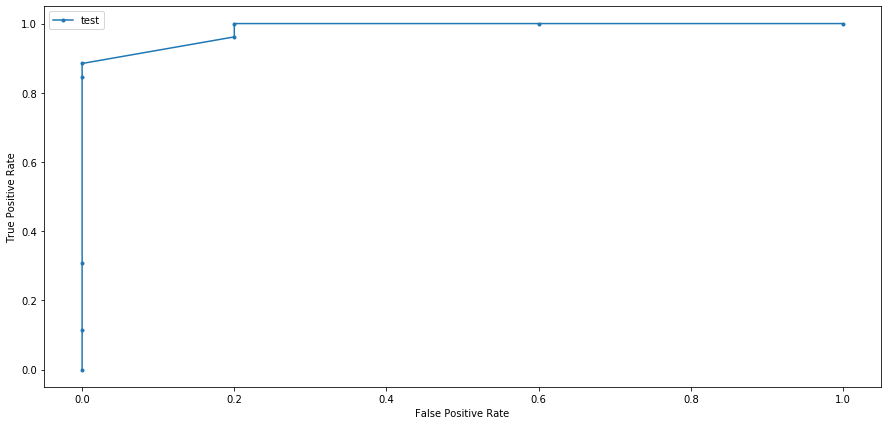

In [30]:
clf_SVM = svm.SVC(gamma = 'auto', kernel = 'rbf',probability=True)
clf_SVM.fit(X_train, y_train)

y_train_prediction = clf_SVM.predict(X_train)
y_test_prediction = clf_SVM.predict(X_test)

y_train_prediction_proba = clf_SVM.predict_proba(X_train)[:, 1]
y_test_prediction_proba = clf_SVM.predict_proba(X_test)[:, 1]

auc_train = roc_auc_score(y_train, y_train_prediction_proba)
auc_test = roc_auc_score(y_test, y_test_prediction_proba)

print('AUC the training set : '+str(auc_train))
print('AUC for the testing set : '+str(auc_test))

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prediction_proba)
fpr_test_SVM, tpr_test_SVM, _ = roc_curve(y_test, y_test_prediction_proba)

fig = plt.figure(figsize=(15,7))
ax = plt.plot(fpr_train, tpr_train, marker='.', label='test')
# ax = plt.plot(fpr_test_SVM, tpr_test_SVM, marker='.', label='test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# show the plot
plt.show()

C:\Users\tahad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tahad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\tahad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the 

AUC the training set : 0.9500000000000001
AUC for the testing set : 0.9642857142857143


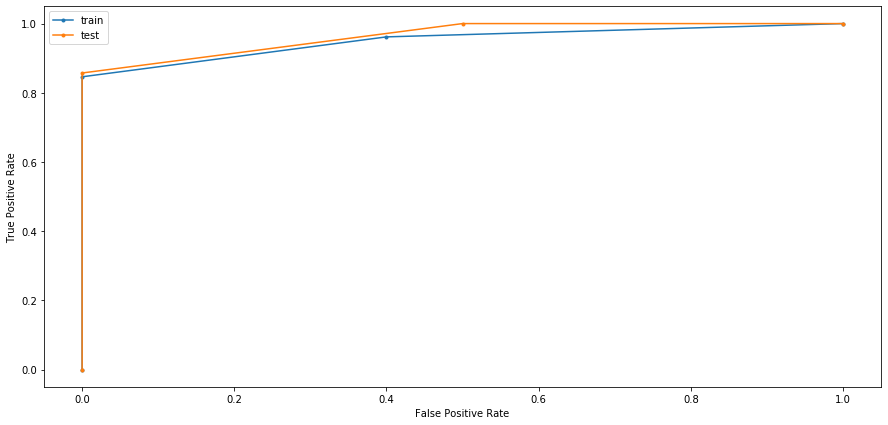

In [23]:
clf_ada = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_ada.fit(X_train, y_train)

y_train_prediction = clf_ada.predict(X_train)
y_test_prediction = clf_ada.predict(X_test)

y_train_prediction_proba = clf.predict_proba(X_train)[:, 1]
y_test_prediction_proba = clf.predict_proba(X_test)[:, 1]

auc_train = roc_auc_score(y_train, y_train_prediction_proba)
auc_test = roc_auc_score(y_test, y_test_prediction_proba)

print('AUC the training set : '+str(auc_train))
print('AUC for the testing set : '+str(auc_test))

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prediction_proba)
fpr_test_ada, tpr_test_ada, _ = roc_curve(y_test, y_test_prediction_proba)

fig = plt.figure(figsize=(15,7))
ax = plt.plot(fpr_train, tpr_train, marker='.', label='train')
ax = plt.plot(fpr_test, tpr_test, marker='.', label='test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# show the plot
plt.show()

C:\Users\tahad\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\tahad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\tahad\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-

AUC the training set : 0.9500000000000001
AUC for the testing set : 0.9642857142857143


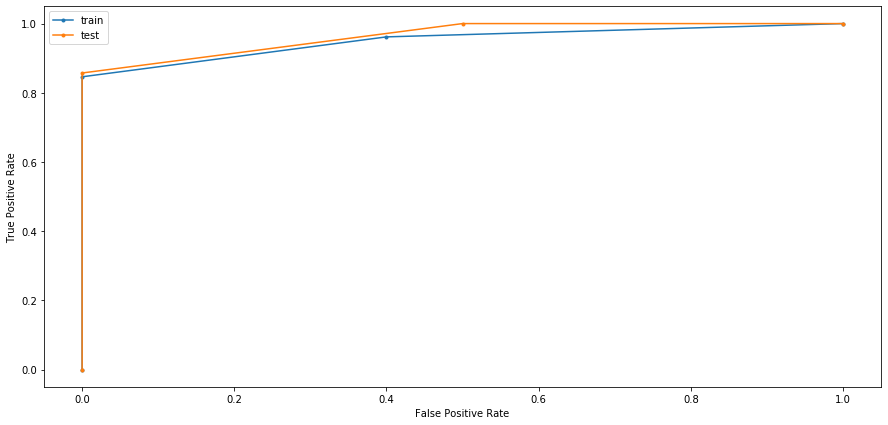

In [24]:
clf_ranfor = RandomForestClassifier(max_depth=2, random_state=0)
clf_ranfor.fit(X_train, y_train)

y_train_prediction = clf_ranfor.predict(X_train)
y_test_prediction = clf_ranfor.predict(X_test)

y_train_prediction_proba = clf.predict_proba(X_train)[:, 1]
y_test_prediction_proba = clf.predict_proba(X_test)[:, 1]

auc_train = roc_auc_score(y_train, y_train_prediction_proba)
auc_test = roc_auc_score(y_test, y_test_prediction_proba)

print('AUC the training set : '+str(auc_train))
print('AUC for the testing set : '+str(auc_test))

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prediction_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prediction_proba)

fig = plt.figure(figsize=(15,7))
ax = plt.plot(fpr_train, tpr_train, marker='.', label='train')
ax = plt.plot(fpr_test, tpr_test, marker='.', label='test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# show the plot
plt.show()